In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Biblioteques de traitement de texte
import nltk
import string


from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

## Fonction

In [2]:
def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

In [3]:
def graph_objet(df,X,Y,title):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10,6))
    sns.barplot(x = df.groupby([X]).count().sort_values(by=Y, 
                ascending=False)[Y].head(10).values,
                y = df.groupby([X]).count().sort_values(by=Y,
                ascending=False)[Y].head(10).index)
    plt.title(title)

In [4]:
def remove_column(df,columns):
    df.drop(labels=columns,axis=1, inplace= True)

In [5]:
def unique_object(df):
    for col in df.select_dtypes('object'):
        print(f'{col:-<50} {df[col].unique()}')

In [6]:
def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ').replace('(','').replace(')','')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

In [7]:
#Stop words
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

In [8]:
# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

In [9]:
# 
def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

In [10]:
# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    return lem_w

In [11]:
# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    return lw

## Pretraitement des données

Dans cette première partie, on réalisera une analyse sur les variables présentes dans le dataframe, pour cela on regardera les variables à intérêts ainsi que les données qui nous apportent le plus d'informations.

In [12]:
df=pd.read_csv(r"C:\Users\cardn\P6_Huamani_Luis_2\Dataset+projet+pretraitement+textes+images\Flipkart\flipkart_com_ecommerce_sample_1050.csv")

In [13]:
df.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

Voulant créer de clusters, on a besoin de repérer les articlé indépendamment de leur classe, on peut donc conserver la variable uniq_id car elle va nous permettre de repérer chaque article, on peut conserver aussi la variable product_category_tree, cette variable va nous permettre de différencier chaque article pour la même raison on conservera la variable description.

On va donc créer un nouveau dataframe qui contiendra ces variables.

In [15]:
df=df[['uniq_id','product_name','product_category_tree','description','image']]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   uniq_id                1050 non-null   object
 1   product_name           1050 non-null   object
 2   product_category_tree  1050 non-null   object
 3   description            1050 non-null   object
 4   image                  1050 non-null   object
dtypes: object(5)
memory usage: 41.1+ KB


## Analyse de texte 

Dans cette parti, on analysera les données textuelle qui contient les variables, pour commencer on traitera la variable prodcut_category_tree

In [17]:
df['product_category_tree'].unique()

array(['["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]',
       '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]',
       '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]',
       '["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]',
       '["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]',
       '["Watches >> Wrist Watches >> Maserati Time Wrist Watches"]',
       '["Watches >> Wrist Watches >> Camerii Wrist Watches"]',
       '["Watches >> Wrist Watches >> T STAR Wrist Watches"]',
       '["Watches >> Wrist Watches >> Alfajr Wrist Watches"]',
       '["Watches >> Wrist Watches >> T

Ci-dessus, on observe qu'on peut avoir jusqu'a un maximum de 7 catégories pour un objet, on peut donc se poser comme question si tous les articles peuvent être représentés par 7 catégories, pour réaliser cela on créera des nouvelles variables qui contiendront les données de chaque catégorie.

In [18]:
df['category_clean']=df['product_category_tree'].apply(lambda c: c.replace('["','').replace('"]','').split('>>'))

In [19]:
len(df['category_clean'])

1050

In [20]:
df['category_1']='Nan'
df['category_2']='Nan'
df['category_3']='Nan'
df['category_4']='Nan'
df['category_5']='Nan'
df['category_6']='Nan'
df['category_7']='Nan'

In [21]:
df['category_1']=df['product_category_tree'].apply(lambda c: c.replace('["','').replace('"]','').split('>>')[0])
df['category_2']=df['product_category_tree'].apply(lambda c: c.replace('["','').replace('"]','').split('>>')[1])

In [22]:
for i,val in enumerate(df['category_clean']):
    if len(df['category_clean'][i])<3:
        df['category_3'].loc[i]='Nan'
    else: 
        df['category_3'].loc[i]=val[2]
    if len(df['category_clean'][i])<4:
        df['category_4'].loc[i]='Nan'
    else: 
        df['category_4'].loc[i]=val[3]
    if len(df['category_clean'][i])<5:
        df['category_5'].loc[i]='Nan'
    else: 
        df['category_5'].loc[i]=val[4]
    if len(df['category_clean'][i])<6:
        df['category_6'].loc[i]='Nan'
    else: 
        df['category_6'].loc[i]=val[5]
    if len(df['category_clean'][i])<7:
        df['category_7'].loc[i]='Nan'
    else: 
        df['category_7'].loc[i]=val[6]

In [23]:
remove_column(df,['product_category_tree','category_clean'])

In [25]:
df['category_1'].value_counts()

Home Furnishing                150
Baby Care                      150
Watches                        150
Home Decor & Festive Needs     150
Kitchen & Dining               150
Beauty and Personal Care       150
Computers                      150
Name: category_1, dtype: int64

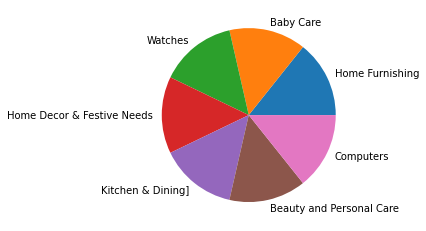

In [26]:
fig1, ax1 = plt.subplots()
plt.pie(df['category_1'].value_counts(),labels=['Home Furnishing','Baby Care','Watches',
                                                'Home Decor & Festive Needs','Kitchen & Dining]',
                                                'Beauty and Personal Care','Computers'])
plt.show()

Apres une premiere observation, on observe que la categorie 1 divise les articles en 7 de facon homogene, pour le moment cette categorie semble la plus interessant.

In [45]:
df['category_2'].value_counts().head(10)

 Wrist Watches                 149
 Laptop Accessories             87
 Infant Wear                    84
 Coffee Mugs                    74
 Showpieces                     71
 Bed Linen                      65
 Fragrances                     65
 Network Components             49
 Cookware                       27
 Table Decor & Handicrafts      27
Name: category_2, dtype: int64

C:\Users\cardn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category_2'>

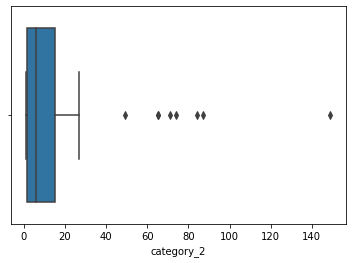

In [28]:
sns.boxplot(df['category_2'].value_counts())

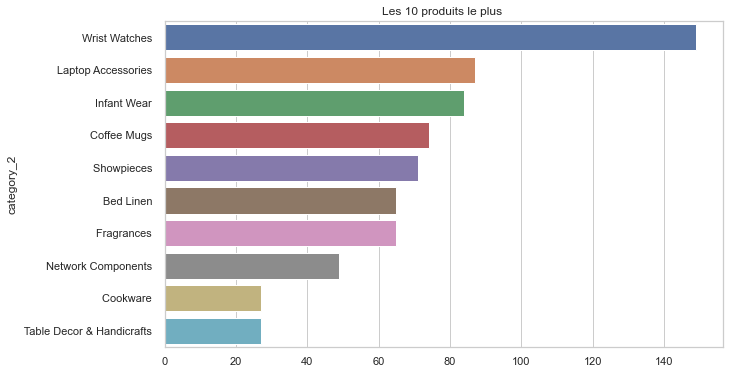

In [29]:
graph_objet(df,'category_2','product_name','Les 10 produits le plus ')

In [35]:
df.describe(include='object').transpose()

,count,unique,top,freq
uniq_id,1050,1050,55b85ea15a1536d46b7190ad6fff8ce7,1
product_name,1050,1050,Elegance Polyester Multicolor Abstract Eyelet ...,1
description,1050,1050,Key Features of Elegance Polyester Multicolor ...,1
image,1050,1050,55b85ea15a1536d46b7190ad6fff8ce7.jpg,1
category_1,1050,7,Home Furnishing,150
category_2,1050,63,Wrist Watches,149
category_3,1050,247,Deodorants,65
category_4,1050,351,Nan,371
category_5,1050,298,Nan,645
category_6,1050,118,Nan,923


Dans la categorie 2 on observe que la distribution n'est pas homogene, on aura donc une forte influence des certains categories par rapport aux autres il faut donc eviter d'utiliser la variable category_2 pour realiser les cluster, car on generera une contrainte de plus lors de la creation des clusters.

Pour les categories de 3 au 7; on ne peut la prendre en comptes car ils ont des valeur manquantes, on si on prend ces données pour realiser des cluster on se verra obligé d'effacer quelques données, on faussera ainsi nos cluster, ils ne seront pas assez general pour la representation des produits.

In [32]:
df['len']='new_variable'

In [33]:
for i,val in enumerate(df['description']):
    df['len'].loc[i]=len(df['description'][i])

C:\Users\cardn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='len', ylabel='Density'>

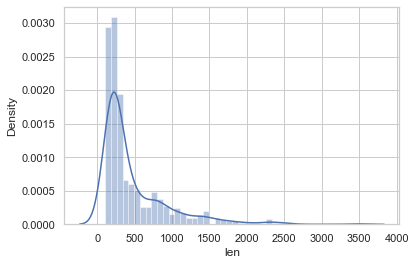

In [34]:
# Distribution par largueur de phrase 
sns.distplot(df['len'])

Ci-dessus, on observe la distribution de la taille de la description de chaque objet, on observe que la plupart des mots dans la description ont moins de 1500 mots, le reste est superieur a la moyenne.

Dans la suite, on traitera chaque mot dans la variable description pour cela on va d'abord realiser une tkenisation sur chaque description puis une lemmatization afin de recuperer les racines de chaque mot, et limité l'influence des points d'exclamation ainsi que les espaces.

In [37]:
df_test=df.copy()

In [38]:
df['description_product']=df['product_name']+' '+df['description']

In [39]:
df['description_bow_lem']=df['description'].apply(lambda x: transform_bow_lem_fct(x))
df['description_dl']=df['description'].apply(lambda x: transform_dl_fct(x))

In [40]:
df['description_product_bow_lem']=df['description_product'].apply(lambda x: transform_bow_lem_fct(x))
df['description_product_dl']=df['description_product'].apply(lambda x: transform_dl_fct(x))

In [41]:
df_text=df[['uniq_id','product_name','description','category_1','description_bow_lem',
            'description_dl','description_product_bow_lem','description_product_dl']]

Pour la suite on prendra seulement la category_1 pour realiser le clusters

In [42]:
df_text.to_csv('df_text.csv', index=False)